<a href="https://colab.research.google.com/github/SiraDD/Monte-Carlo-Options/blob/main/LSTM_time_series_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 837.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 13.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import datetime
import matplotlib.pyplot as plt
import yfinance as yfin
yfin.pdr_override()

In [8]:
endDate = datetime.datetime.now()
startDate = endDate - datetime.timedelta(days=12000)
df = pdr.get_data_yahoo('MSFT', startDate, endDate)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-03-29 00:00:00-05:00,0.766493,0.782986,0.763889,0.767361,0.479954,64785600
1990-03-30 00:00:00-05:00,0.763889,0.770833,0.758681,0.769097,0.481040,36691200
1990-04-02 00:00:00-04:00,0.762153,0.780382,0.758681,0.774306,0.484298,74059200
1990-04-03 00:00:00-04:00,0.782986,0.807292,0.781250,0.805556,0.503844,84643200
1990-04-04 00:00:00-04:00,0.805556,0.824653,0.802083,0.812500,0.508187,79646400
...,...,...,...,...,...,...
2023-01-30 00:00:00-05:00,244.509995,245.600006,242.199997,242.710007,242.710007,25867400
2023-01-31 00:00:00-05:00,243.449997,247.949997,242.949997,247.809998,247.809998,26541100
2023-02-01 00:00:00-05:00,248.000000,255.179993,245.470001,252.750000,252.750000,31259900


In [9]:
df = df.tz_localize(None)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-03-29,0.766493,0.782986,0.763889,0.767361,0.479954,64785600
1990-03-30,0.763889,0.770833,0.758681,0.769097,0.481040,36691200
1990-04-02,0.762153,0.780382,0.758681,0.774306,0.484298,74059200
1990-04-03,0.782986,0.807292,0.781250,0.805556,0.503844,84643200
1990-04-04,0.805556,0.824653,0.802083,0.812500,0.508187,79646400
...,...,...,...,...,...,...
2023-01-30,244.509995,245.600006,242.199997,242.710007,242.710007,25867400
2023-01-31,243.449997,247.949997,242.949997,247.809998,247.809998,26541100
2023-02-01,248.000000,255.179993,245.470001,252.750000,252.750000,31259900


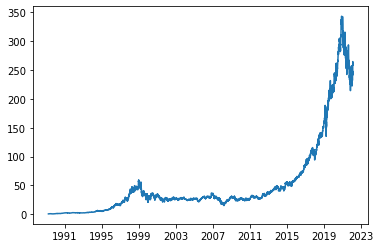

In [3]:
plt.plot(df.index,df['Close'])

In [4]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

In [5]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

In [24]:
windowed_df = df_to_windowed_df(df,
                             '2021-02-23',
                             '2022-02-23',
                             n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-02-23,243.789993,240.970001,234.509995,233.270004
1,2021-02-24,240.970001,234.509995,233.270004,234.550003
2,2021-02-25,234.509995,233.270004,234.550003,228.990005
3,2021-02-26,233.270004,234.550003,228.990005,232.380005
4,2021-03-01,234.550003,228.990005,232.380005,236.940002
...,...,...,...,...,...
249,2022-02-16,295.040009,295.000000,300.470001,299.500000
250,2022-02-17,295.000000,300.470001,299.500000,290.730011
251,2022-02-18,300.470001,299.500000,290.730011,287.929993
252,2022-02-22,299.500000,290.730011,287.929993,287.720001


In [25]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((254,), (254, 3, 1), (254,))

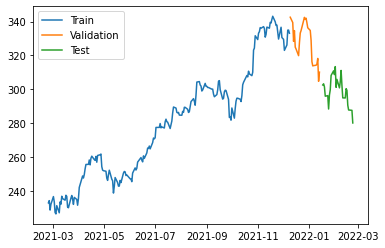

In [27]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 92ms/step - loss: 79013.8359 - mean_absolute_error: 279.2020 - val_loss: 106993.8125 - val_mean_absolute_error: 326.9037
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 78742.7500 - mean_absolute_error: 278.7132 - val_loss: 106718.6172 - val_mean_absolute_error: 326.4824
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 78483.7500 - mean_absolute_error: 278.2493 - val_loss: 106366.3125 - val_mean_absolute_error: 325.9424
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 78148.2344 - mean_absolute_error: 277.6449 - val_loss: 105888.2969 - val_mean_absolute_error: 325.2083
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 77708.5938 - mean_absolute_error: 276.8503 - val_loss: 105333.6172 - val_mean_absolute_error: 324.3544
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 77215.8516 - mean_absolute_error: 275.9625 - val_loss: 10

7/7 [==============================] - 1s 4ms/step


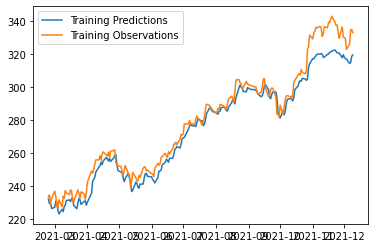

In [29]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 30ms/step


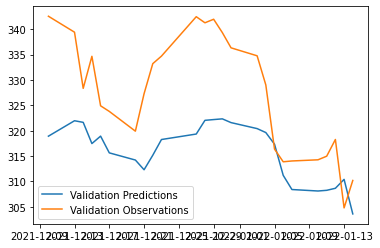

In [30]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 70ms/step


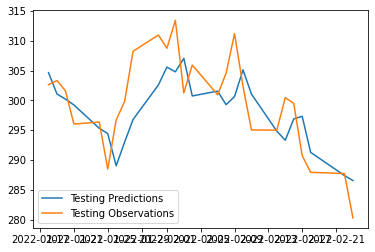

In [31]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

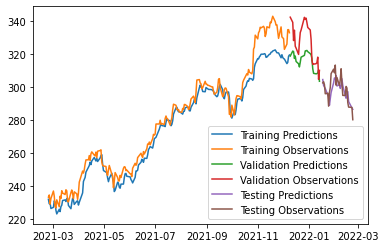

In [32]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])